In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
import numpy as np
from pandas.core.interchange.dataframe_protocol import DataFrame

#### Graphs Function for top Countries Regarding


In [8]:
def trend_of_immigration_over_years(df: pd.DataFrame):
    """
    Analyzes the trend of immigration over multiple years from the input dataset.

    This function takes a DataFrame containing immigration data, identifies trends over time,
    and creates visualizations to help analyze changes in immigration patterns.

    Parameters:
    - df (DataFrame): A DataFrame containing immigration data with at least the columns
                      'Year', 'Country', and 'Immigration'.

    Returns:
    - None: This function is expected to visualize the results or return insights
            (implementations can vary based on requirement).
    """
    plt.figure(figsize=(15, 6))
    # Disable scientific notation on the x-axis
    plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}'))
    
    # make sure only years data, and total of all years should be at last row
    years = df.columns[1:].astype(str)
    total_of_all_years = df.iloc[-1, 1:].astype(int)

    print('data type of years: ', years.dtype)
    print('data type of total_of_all_years: ', total_of_all_years.dtype)

    plt.plot(years, total_of_all_years, label=None)
    plt.title('Student Visa Trend Over Different Years')
    plt.xlabel('year')
    plt.ylabel('immigration count')
    plt.show()

In [11]:
def pie_chart_btw_top_countries(df, top: int = 10):
    """
    Displays a pie chart for the top `top` countries based on the total sum of immigration values.

    Parameters:
    - df (DataFrame): A DataFrame containing immigration data with a 'Country of Citizenship' column
                      and immigration counts across multiple years.
    - top (int, optional): The number of top countries to include in the pie chart. Default is 10.

    Returns:
    - None: Displays the pie chart.
    """
    # Aggregate immigration data by country and calculate the total sum
    country_totals = df.groupby('Country of Citizenship').sum()

    # Sort and select the top N countries
    top_countries = country_totals.sum(axis=1).nlargest(top)

    # Extract country names and their corresponding sums
    labels = top_countries.index
    sizes = top_countries.values

    # Plot the pie chart
    plt.figure(figsize=(10, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(f"Top {top} Countries by Total Immigration")
    plt.show()


In [12]:
def histogram_data_of_top_10_countries(df, top: int = 10):
    """
    Displays a histogram of immigration data for the top `top` countries over the years.

    Parameters:
    - df (DataFrame): A DataFrame containing immigration data, where countries are in a column
                      labeled 'Country of Citizenship' and immigration counts are in the other columns.
    - top (int, optional): The number of top countries to consider. Default is 10.

    Returns:
    - None: Displays a histogram of immigration data for the top countries.
    """
    # Aggregate immigration data by country and calculate yearly totals
    country_totals = df.groupby('Country of Citizenship').sum()

    # Sort by total immigration and select the top N countries
    top_countries = country_totals.sum(axis=1).nlargest(top)
    top_countries_data = country_totals.loc[top_countries.index]

    # Transpose for plotting (years as x-axis, countries as multi-bars)
    transposed_data = top_countries_data.T

    # Histogram
    plt.figure(figsize=(15, 8))
    transposed_data.plot(kind='bar', figsize=(15, 8), width=0.8)
    plt.title(f"Immigration Data for Top {top} Countries Over Years")
    plt.xlabel("Years")
    plt.ylabel("Number of Immigrants")
    plt.legend(title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjust plot to fit elements
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


#### Functions Related to Visualization btw two different countries

In [13]:
def area_chart_btw_2_countries_last_5year(df, country1, country2):
    """
    Plots an area chart to compare the immigration trends of two countries over the last five years.

    This function takes a DataFrame containing immigration data, filters the last five years' data
    for the two specified countries, and creates an area chart to visualize the trends.

    Parameters:
    - df (DataFrame): A DataFrame containing immigration data, with a 'Country of Citizenship' column
                      and columns for yearly immigration statistics.
    - country1 (str): Name of the first country to include in the plot.
    - country2 (str): Name of the second country to include in the plot.

    Returns:
    - None: Displays an area plot of immigration trends over the last five years.
    """

    country1_df = df[(df['Country of Citizenship'] == country1)]
    country2_df = df[(df['Country of Citizenship'] == country2)]

    # Area plot
    plt.figure(figsize=(10, 6))
    plt.stackplot(
        country1_df.columns[-5:],
        country1_df.iloc[:, -5:],
        labels=[country1],
        alpha=0.7
    )
    plt.stackplot(
        country2_df.columns[-5:],
        country2_df.iloc[:, -5:],
        labels=[country2],
        alpha=0.7
    )
    plt.title(f"Immigration Data: {country1} vs {country2} (Last 5 Years - Area Plot)")
    plt.xlabel("Year")
    plt.ylabel("Number of Immigrants")
    plt.legend()
    plt.grid(True)
    plt.show()

In [35]:
def histogram_btw_2_countries_last5_year(df, country1, country2):
    """
    Compares the immigration data of two countries using a histogram.

    This function compares the immigration patterns of two specified countries
    over the last five years using a histogram. Each year's immigration count
    is plotted as a bin, where the recent 5 years' data for both countries are
    displayed as overlapping bars in the histogram.

    Parameters:
    - df (DataFrame): A DataFrame containing immigration data, including columns
                      for 'Country of Citizenship' and the last five years of data.
    - country1 (str): The name of the first country to include in the comparison.
    - country2 (str): The name of the second country to include in the comparison.

    Returns:
    - None: Displays the histogram visualization.
    """

    country1_df = df[(df['Country of Citizenship'] == country1)]
    country2_df = df[(df['Country of Citizenship'] == country2)]

    # Ensure that we only take the last 5 years of data and flatten it into 1D arrays
    country1_data = country1_df.iloc[:, -5:].sum(axis=1).values
    country2_data = country2_df.iloc[:, -5:].sum(axis=1).values

    # Histogram
    plt.figure(figsize=(10, 6))
    plt.hist([country1_data, country2_data], bins=5, label=[country1, country2], alpha=0.7)
    plt.title(f"Immigration Data: {country1} vs {country2} (Last 5 Years - Histogram)")
    plt.xlabel("Number of Immigrants")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)
    plt.show()

In [41]:
def line_chart_btw_2_countries_last_5_years(df, country1, country2):
    """
    Plots a line chart comparing the immigration trends of two specified countries over the last five years.

    This function takes a DataFrame with immigration data, filters data for two specified countries 
    and the last five years, and creates a line chart to visualize their trends.

    Parameters:
    - df (pd.DataFrame): The input DataFrame containing immigration data. It must include 
                         a 'Country of Citizenship' column and columns for yearly immigration statistics.
    - country1 (str): The name of the first country whose immigration trend is plotted.
    - country2 (str): The name of the second country whose immigration trend is plotted.

    Returns:
    - None: Displays the line chart comparing yearly immigration patterns for the two countries.
    """

    country1_df = df[(df['Country of Citizenship'] == country1)]
    country2_df = df[(df['Country of Citizenship'] == country2)]

    # Line plot
    plt.figure(figsize=(10, 6))
    plt.plot(country1_df.columns[-5:], country1_df.iloc[0, -5:], label=country1, marker='o')
    plt.plot(country2_df.columns[-5:], country2_df.iloc[0, -5:], label=country2, marker='x')
    plt.title(f"Immigration Data: {country1} vs {country2} (Last 5 Years - Line Plot)")
    plt.xlabel("Year")
    plt.ylabel("Number of Immigrants")
    plt.legend()
    plt.grid(True)
    plt.show()


In [47]:
def pie_chart_btw_2_countries(df, country1, country2):
    """
    Generates a pie chart comparing total immigration numbers for two specified countries 
    over the last five years.

    This function extracts immigration data for two countries and calculates their total 
    immigration counts across the last five years. It then creates a pie chart that shows 
    their relative contributions to the total, helping to visualize the distribution of immigrants 
    between the two countries.

    Parameters:
    - country1 (str): The name of the first country to include in the comparison.
    - country2 (str): The name of the second country to include in the comparison.
    - df (pd.DataFrame): A DataFrame containing immigration data with a 'Country of Citizenship' column 
                         and columns representing yearly immigration statistics.

    Returns:
    - None: Displays the pie chart to visualize the comparison.
    """

    country1_data = df[(df['Country of Citizenship'] == country1)]
    country2_data = df[(df['Country of Citizenship'] == country2)]

    # Pie chart
    plt.figure(figsize=(8, 8))
    total_immigration = [
        country1_data.iloc[0, 1:].sum(),
        country2_data.iloc[0, 1:].sum()
    ]
    plt.pie(total_immigration, labels=[country1, country2], autopct='%1.1f%%', startangle=140)
    plt.title(f"Total Immigration Comparison: {country1} vs {country2} (Last 5 Years - Pie Chart)")
    plt.show()

In [50]:
def plot_last_5_years_variety(df, country1, country2):
    """
    Generates a variety of visualizations comparing immigration trends for two countries over the last 5 years.

    This function uses multiple plotting functions to visualize and compare immigration data 
    for two specified countries. It includes area charts, histograms, line plots, and pie charts.

    Parameters:
    - country1 (str): The name of the first country to visualize.
    - country2 (str): The name of the second country to visualize.
    - df (DataFrame): A DataFrame containing immigration data where rows reflect countries and columns 
                      reflect the years.

    Returns:
    - None: The function only generates and displays visualizations.
    """

    # Plot an area chart to compare immigration trends for the two countries over the last 5 years
    area_chart_btw_2_countries_last_5year(df, country1, country2)

    # Plot a histogram to highlight immigration patterns for the two countries over the last 5 years
    histogram_btw_2_countries_last5_year(df, country1, country2)

    # Plot a line chart to track and compare yearly immigration trends between the two countries
    line_chart_btw_2_countries_last_5_years(df, country1, country2)

    # Plot a pie chart to compare the total immigration numbers for the two countries in the last 5 years
    pie_chart_btw_2_countries(df, country1, country2)

#### Box plt, others functions

In [18]:
def box_plot_a_country(df, country):
    """
    Generates a box plot for the immigration data of a specified country.

    This function takes a DataFrame containing immigration data, selects the row corresponding
    to the specified country, and generates a box plot to visualize the distribution of immigration
    numbers over the years.

    Parameters:
    - df (pd.DataFrame): A DataFrame containing immigration data with a 'Country of Citizenship' column 
                         and yearly immigration statistics in subsequent columns.
    - country (str): The name of the country for which the box plot will be generated.

    Returns:
    - None: Displays the box plot.
    """
    # Filter the data for the specified country
    country_data = df[df['Country of Citizenship'] == country]

    # Extract immigration data across all years
    immigration_data = country_data.iloc[:, 1:].values.flatten()

    # Generate the box plot
    plt.figure(figsize=(8, 6))
    plt.boxplot(immigration_data, vert=True, patch_artist=True)
    plt.title(f"Immigration Data Distribution for {country}")
    plt.xlabel("Country")
    plt.ylabel("Number of Immigrants")
    plt.show()


In [19]:
def box_plot_all_countries(df):
    """
    Generates a box plot for the immigration data of all countries.

    This function takes a DataFrame containing immigration data, extracts immigration statistics 
    for all countries, and generates a box plot to visualize the distribution of immigration 
    numbers for each country.

    Parameters:
    - df (pd.DataFrame): A DataFrame containing immigration data, where the first column is 
                         'Country of Citizenship' and subsequent columns are yearly statistics.

    Returns:
    - None: Displays the box plot for all countries.
    """
    # Extract immigration data for all countries, excluding the 'Country of Citizenship' column
    immigration_data = df.iloc[:, 1:].T

    # Generate the box plot
    plt.figure(figsize=(15, 8))
    plt.boxplot(immigration_data, patch_artist=True)
    plt.title("Immigration Data Distribution for All Countries")
    plt.xlabel("Years")
    plt.ylabel("Number of Immigrants")
    plt.xticks(ticks=range(1, len(immigration_data.index) + 1), labels=immigration_data.index, rotation=45)
    plt.grid(axis='y')
    plt.show()


In [20]:
def box_plot_last_row(df):
    """
    Generates a box plot for the data in the last row of the DataFrame.

    This function extracts the last row of the DataFrame and creates a box plot
    to visualize the distribution of its values.

    Parameters:
    - df (pd.DataFrame): A DataFrame containing numeric data with multiple rows and columns.

    Returns:
    - None: Displays the box plot.
    """
    # Extract the last row of the DataFrame
    sum_of_all_countries = df.iloc[-1, 1:].values.flatten()

    # Generate the box plot
    plt.figure(figsize=(8, 6))
    plt.boxplot(sum_of_all_countries, vert=True, patch_artist=True)
    plt.title("Box Plot for the Last Row of the DataFrame")
    plt.xlabel("Sum_of_all_countries")
    plt.ylabel("Values")
    plt.show()

#### Visualization functions for a single country

In [21]:
def line_chart_for_a_country(df, country):
    """
    Generates a line chart of the immigration trend of a single country over different years.

    Parameters:
    - df (pd.DataFrame): A DataFrame containing immigration data with a 'Country of Citizenship' column 
                         and columns for yearly immigration statistics.
    - country (str): The name of the country for which the immigration trend will be plotted.

    Returns:
    - None: Displays a line chart showing immigration trends for the specified country.
    """
    # Filter data for the specified country
    country_data = df[df['Country of Citizenship'] == country]

    # Extract year-wise immigration values
    years = country_data.columns[1:]
    immigration_values = country_data.iloc[0, 1:]

    # Generate the line chart
    plt.figure(figsize=(10, 6))
    plt.plot(years, immigration_values, marker='o', label=country)
    plt.title(f"Immigration Trend for {country}")
    plt.xlabel("Year")
    plt.ylabel("Number of Immigrants")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.show()


In [49]:
def scatter_plot_for_a_country(df, country):
    """
    Generates a scatter plot for the immigration data of a specified country over different years.

    Parameters:
    - df (pd.DataFrame): A DataFrame containing immigration data with a 'Country of Citizenship' column 
                         and yearly immigration statistics in subsequent columns.
    - country (str): The name of the country for which the scatter plot will be generated.

    Returns:
    - None: Displays a scatter plot of immigration trends for the specified country.
    """
    # Filter data for the specified country
    country_data = df[(df['Country of Citizenship'] == country)]

    # Extract year-wise immigration values
    years = country_data.columns[1:]
    immigration_values = country_data.iloc[0, 1:]

    # Generate the scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(years, immigration_values, color='blue', label=country)
    plt.title(f"Immigration Trend for {country}")
    plt.xlabel("Year")
    plt.ylabel("Number of Immigrants")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.show()

#### Regression Plot

In [57]:
def regression_line_for_a_country(df, country):
    """
    Plots a regression line over the immigration data for a specified country.

    This function filters immigration data for a specified country, calculates the
    best-fit regression line, and visualizes both the data points and the regression line.

    Parameters:
    - df (pd.DataFrame): A DataFrame containing immigration data with a 'Country of Citizenship' column 
                         and yearly immigration statistics for subsequent columns.
    - country (str): The name of the country for which the regression line is plotted.

    Returns:
    - None: Displays a scatter plot with a regression line for the specified country's immigration data.
    """
    # Filter data for the specified country
    country_data = df[(df['Country of Citizenship'] == country)]

    if country_data.empty:
        raise ValueError(f"No data found for country '{country}'")

    # Extract years and immigration data
    years = np.array([int(col) for col in df.columns[1:]])  # Convert column names to integers
    immigration_values = country_data.iloc[0, 1:].values

    # Ensure numerical data and handle non-numeric entries
    immigration_values = pd.to_numeric(immigration_values)
    if np.isnan(immigration_values).any():
        raise ValueError(f"Invalid numeric data found in 'immigration_values' for country '{country}'")

    # Calculate the best-fit regression line using numpy
    slope, intercept = np.polyfit(years, immigration_values, 1)  # Linear regression fit
    regression_line = slope * years + intercept

    # Plot the scatter chart with the regression line
    plt.figure(figsize=(10, 6))
    plt.scatter(years, immigration_values, label='Original Data', color='blue')
    plt.plot(years, regression_line, label=f'Regression Line (y={slope:.2f}x+{intercept:.2f})', color='red')
    plt.title(f"Regression Line for {country}")
    plt.xlabel("Year")
    plt.ylabel("Immigration Values")
    plt.legend()
    plt.grid()
    plt.show()



In [24]:
def regression_line_for_all_countries(df):
    """
    Plots a regression line for the aggregated immigration data across all countries over different years.

    This function aggregates immigration data from all countries in the DataFrame, calculates the
    best-fit regression line for the total annual immigration counts across all years, 
    and visualizes it using a scatter plot and a regression line.

    Parameters:
    - df (pd.DataFrame): A DataFrame containing immigration data, where rows represent countries and 
                         columns (except the first) represent yearly immigration statistics.

    Returns:
    - None: Displays a scatter plot with a regression line for aggregated immigration data.
    """
    # Aggregate the immigration data across all countries for each year
    years = np.array(df.columns[1:], dtype=int)  # Convert years to integers
    total_immigration_per_year = df.iloc[:, 1:].sum(axis=0).values  # Sum immigration data across all countries

    # Calculate the best-fit regression line using numpy
    slope, intercept = np.polyfit(years, total_immigration_per_year, 1)
    regression_line = slope * years + intercept

    # Plot the scatter chart with the regression line
    plt.figure(figsize=(10, 6))
    plt.scatter(years, total_immigration_per_year, color='blue', label='Aggregated Data Points')
    plt.plot(years, regression_line, color='red', label=f'Regression Line: y={slope:.2f}x+{intercept:.2f}')
    plt.title("Regression Line for Aggregated Immigration Data for All Countries")
    plt.xlabel("Year")
    plt.ylabel("Total Number of Immigrants")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.show()

#### Functions for Visualisation of All Countries

In [25]:
def bar_plot_for_all_countries(df):
    """
    Generates a bar plot of immigration data for all countries over different years.

    This function takes a DataFrame containing immigration data grouped by country and 
    visualizes the immigration trends by showing the aggregated data for all years in 
    a bar plot.

    Parameters:
    - df (pd.DataFrame): A DataFrame containing immigration data, with a 'Country of Citizenship' 
                         column and yearly immigration counts.

    Returns:
    - None: Displays the bar plot visualizing data for all countries.
    """
    # Aggregate immigration data by country
    country_totals = df.groupby('Country of Citizenship').sum()

    # Transpose for plotting
    transposed_data = country_totals.T

    # Plot the bar chart
    transposed_data.plot(kind='bar', figsize=(15, 8), width=0.8)
    plt.title("Immigration Data for All Countries Over Years")
    plt.xlabel("Years")
    plt.ylabel("Number of Immigrants")
    plt.legend(title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

### code

In [26]:
df = pd.read_excel('data/education visa/education_visa_countrywise_cleaned.xlsx')

#### Graphs Related to Different Countries

data type of years:  object
data type of total_of_all_years:  int64


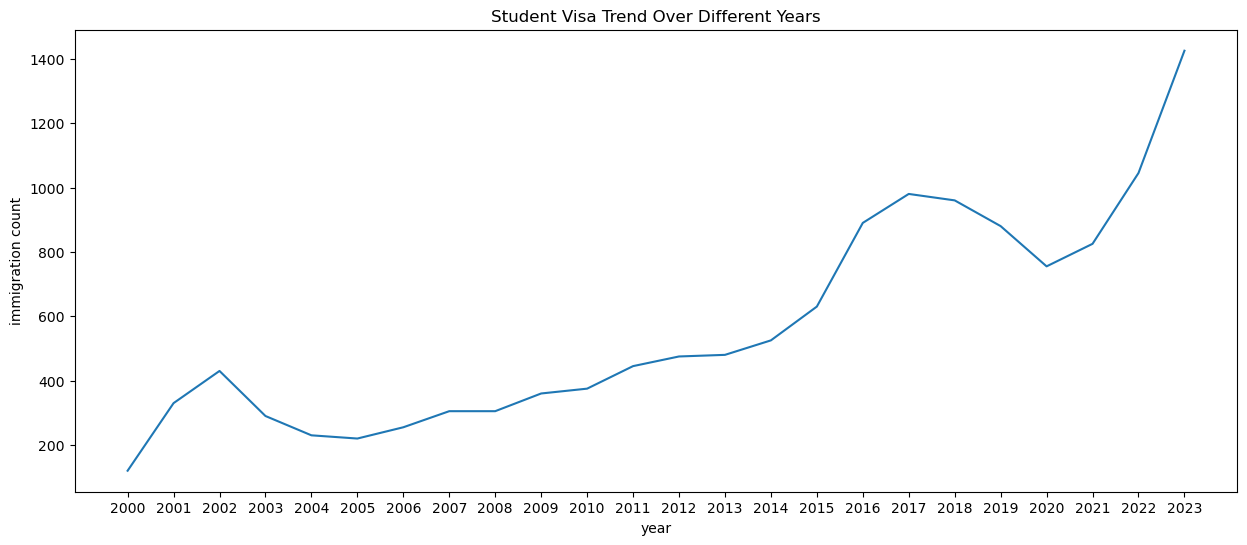

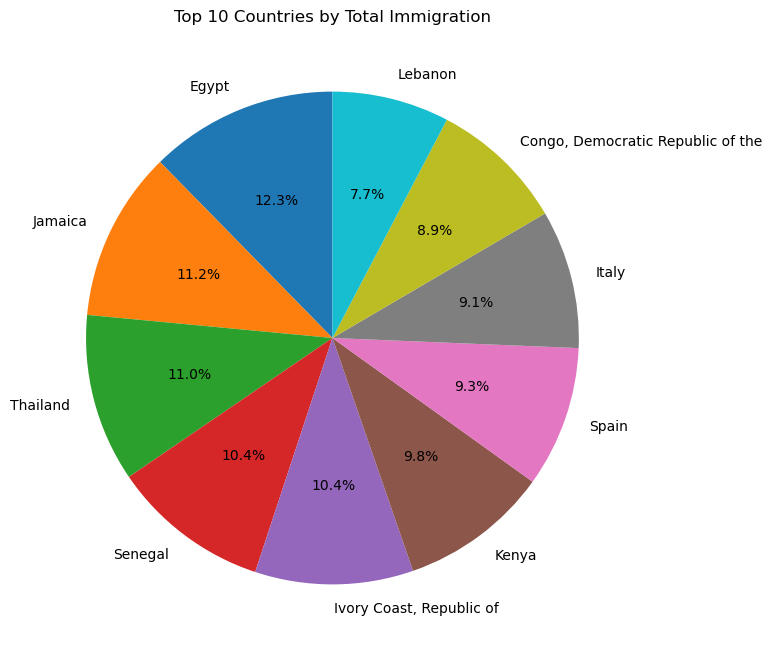

<Figure size 1500x800 with 0 Axes>

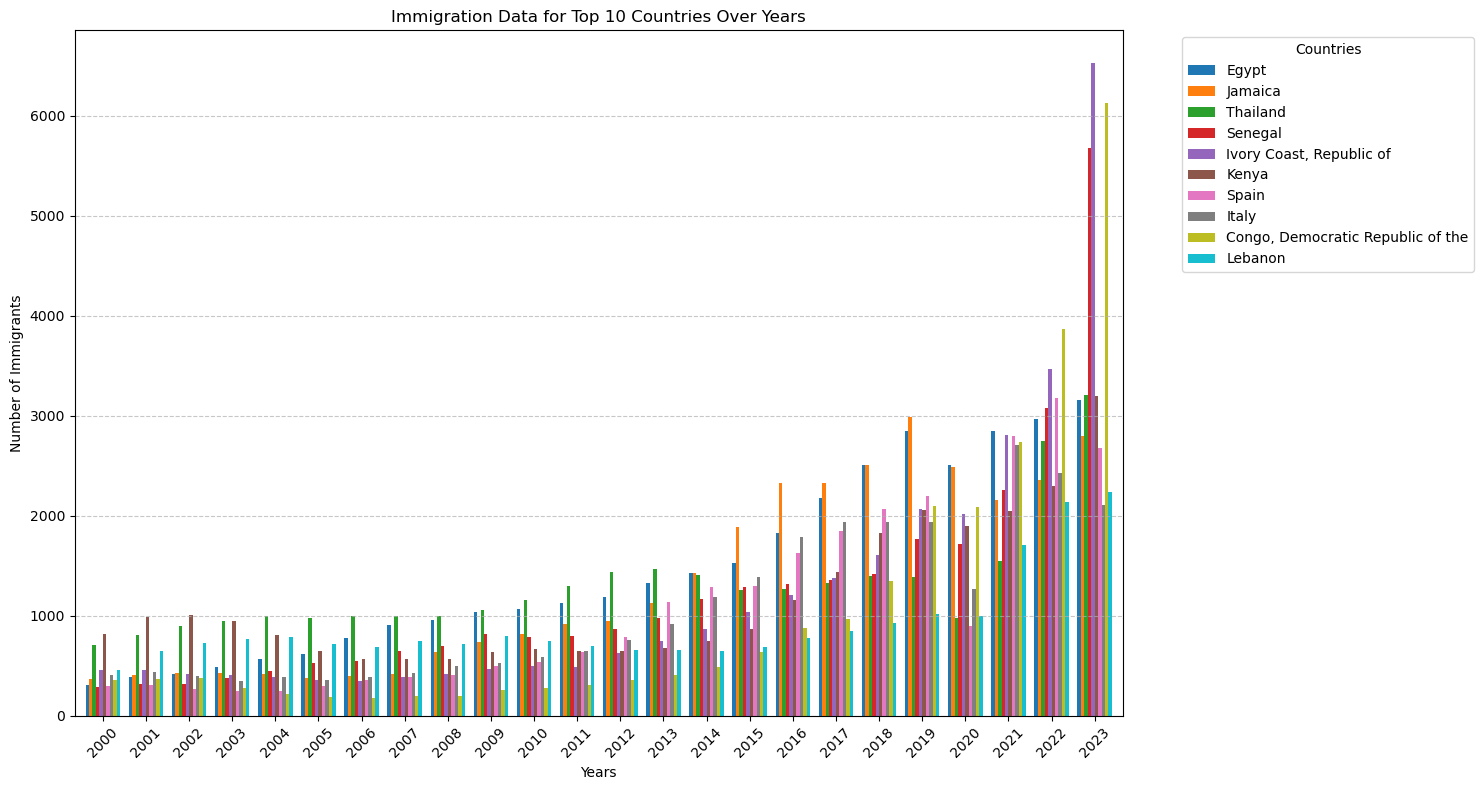

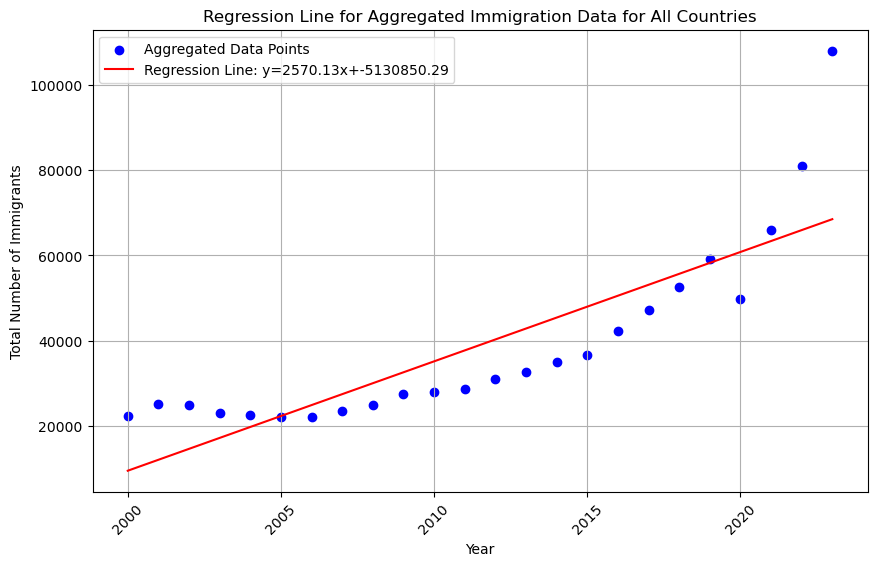

/var/folders/bp/c2pxhf514h7_wvvyqnh0kclc0000gn/T/ipykernel_60882/3886019705.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


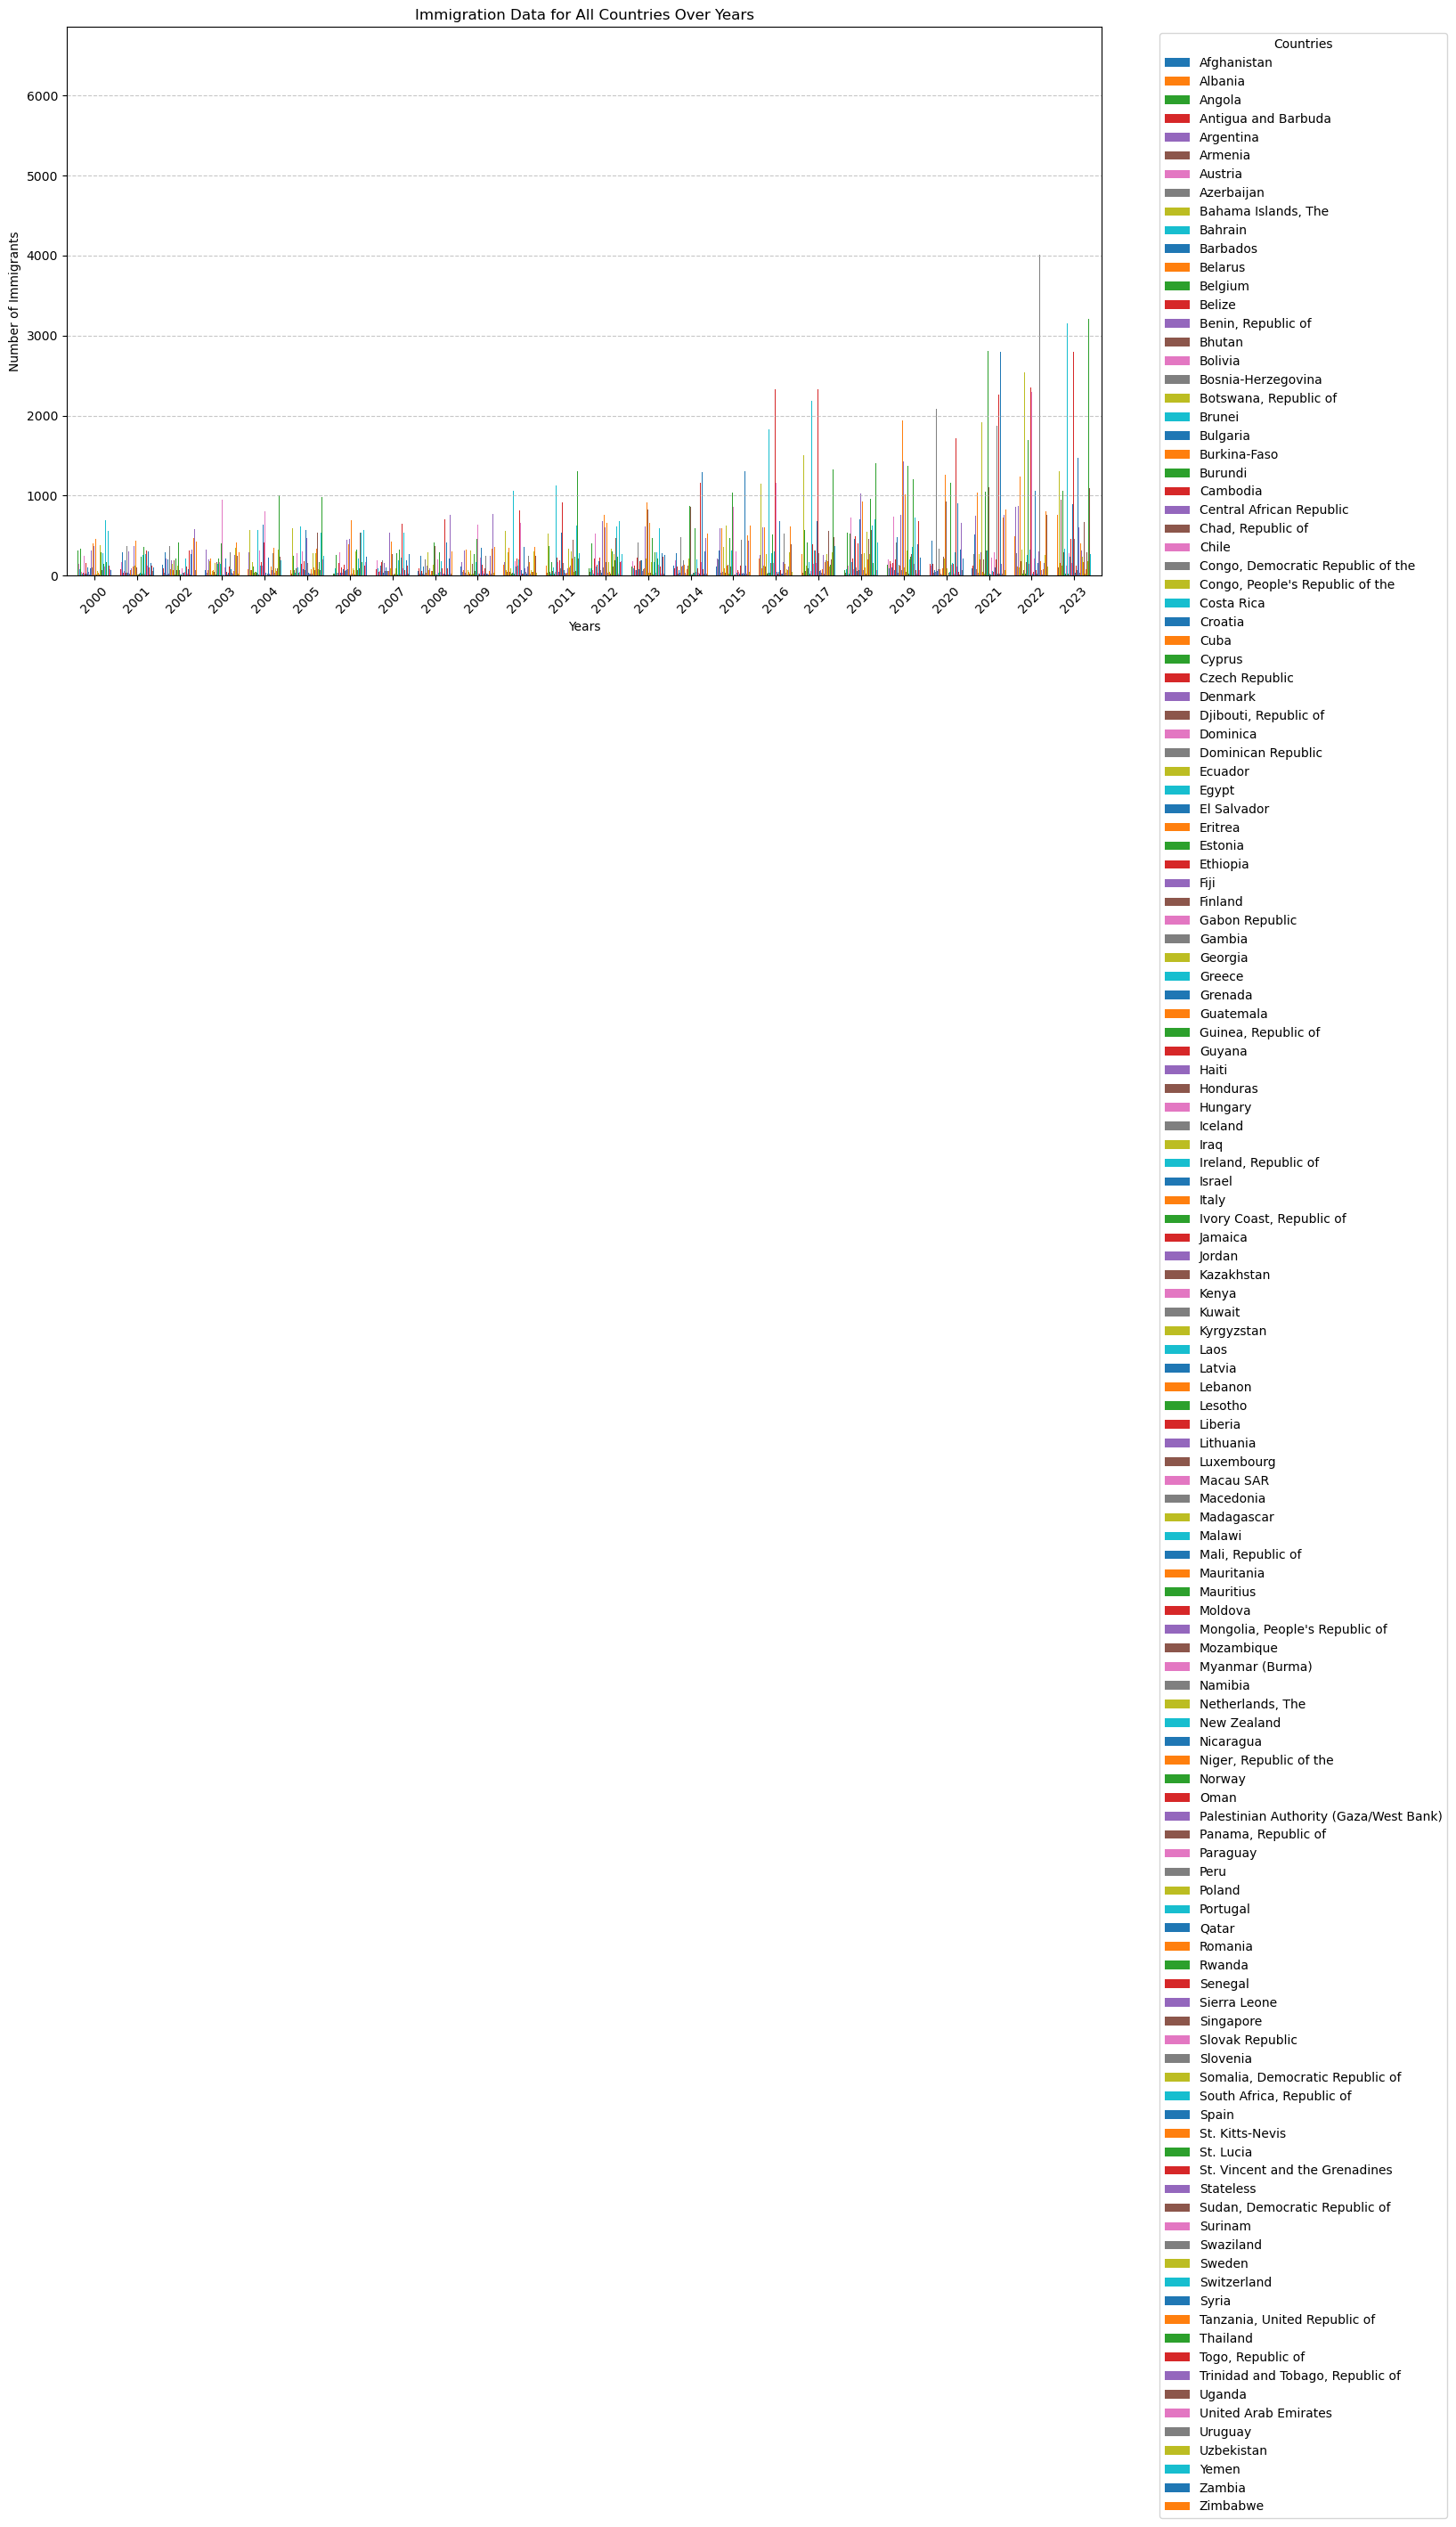

In [27]:
trend_of_immigration_over_years(df)
pie_chart_btw_top_countries(df)
histogram_data_of_top_10_countries(df)
regression_line_for_all_countries(df)
bar_plot_for_all_countries(df)

#### Graphs, Comparsion btw two different countries

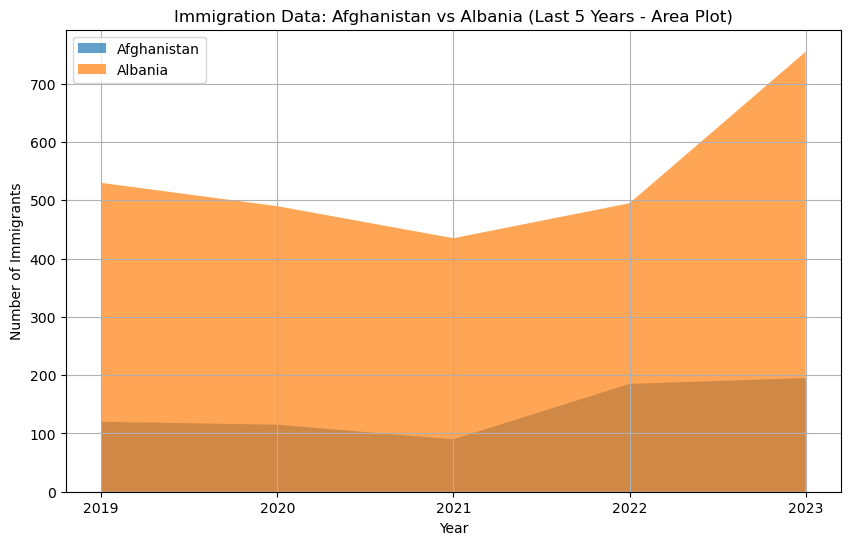

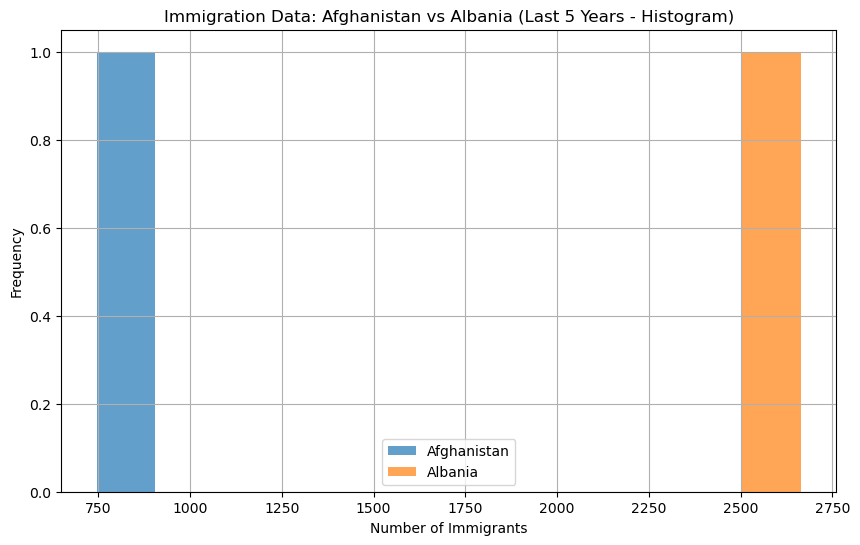

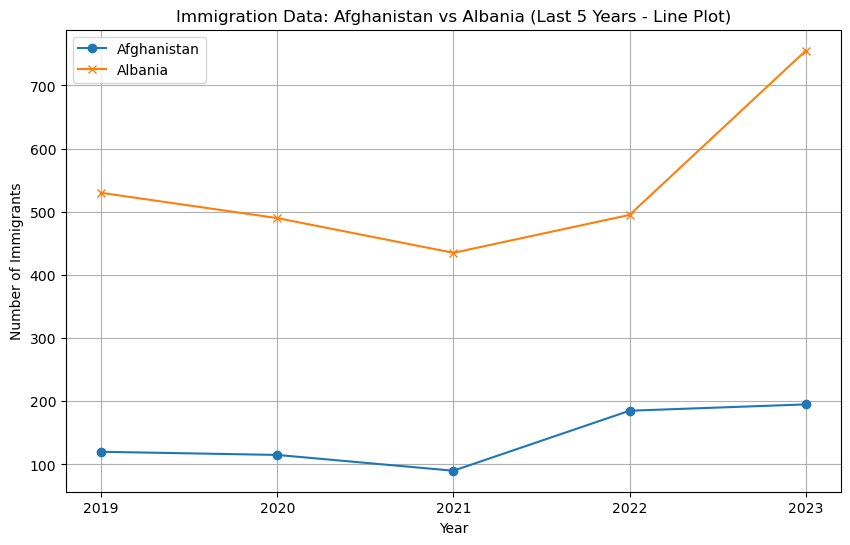

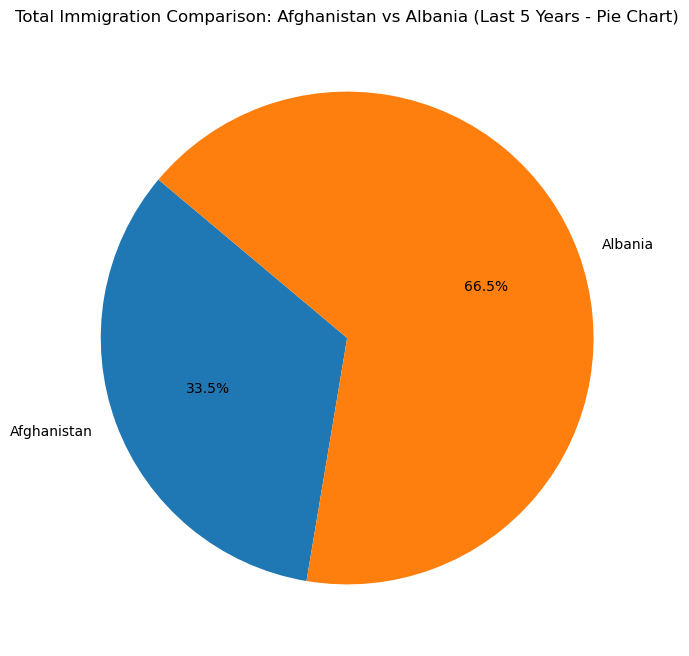

In [52]:
plot_last_5_years_variety(df, 'Afghanistan', 'Albania')

#### Graphs for a Single Country

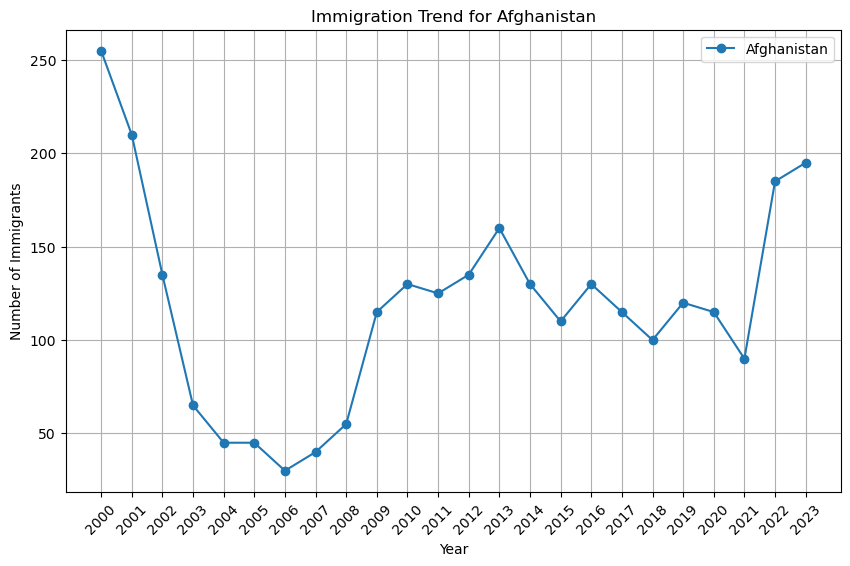

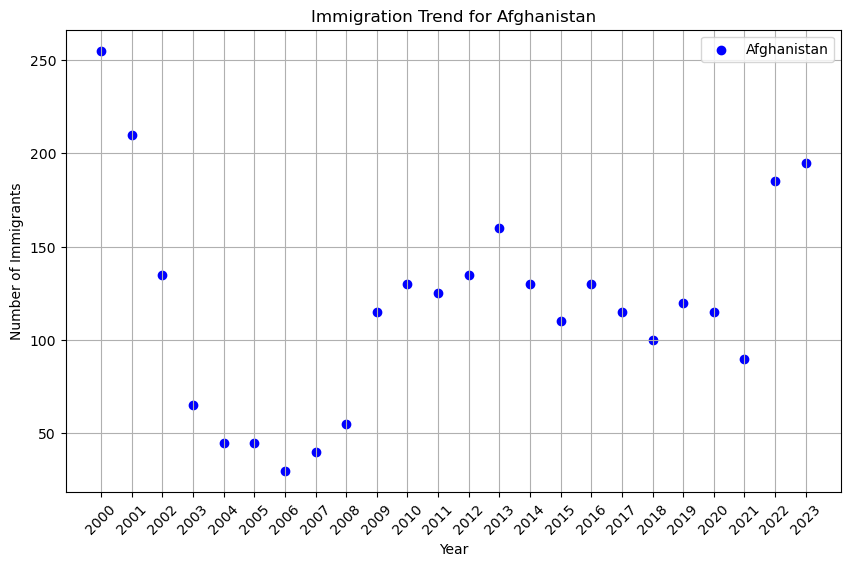

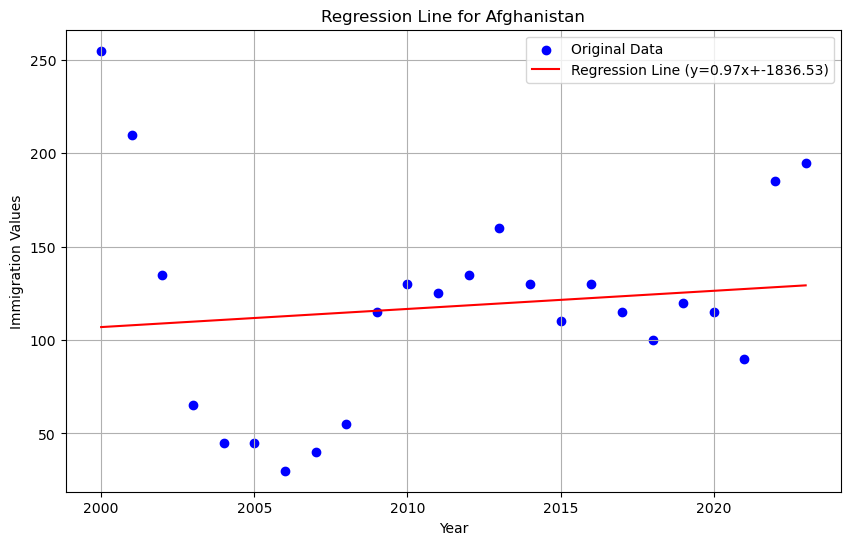

In [58]:
line_chart_for_a_country(df, 'Afghanistan')
scatter_plot_for_a_country(df, 'Afghanistan')
regression_line_for_a_country(df, 'Afghanistan')

#### Boxplots

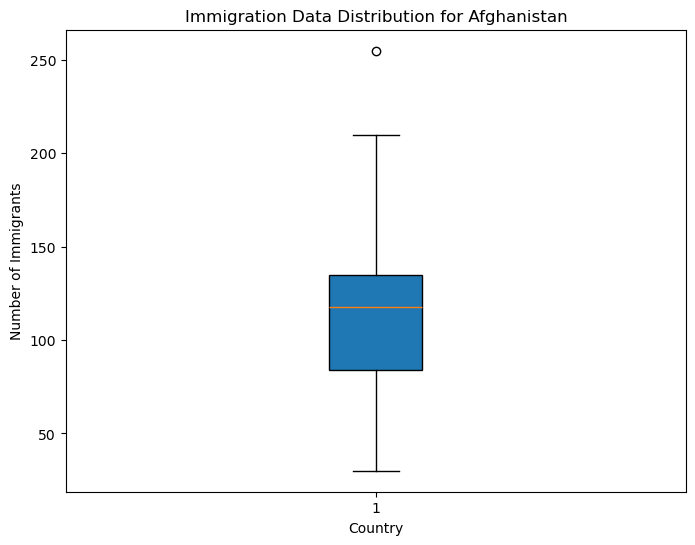

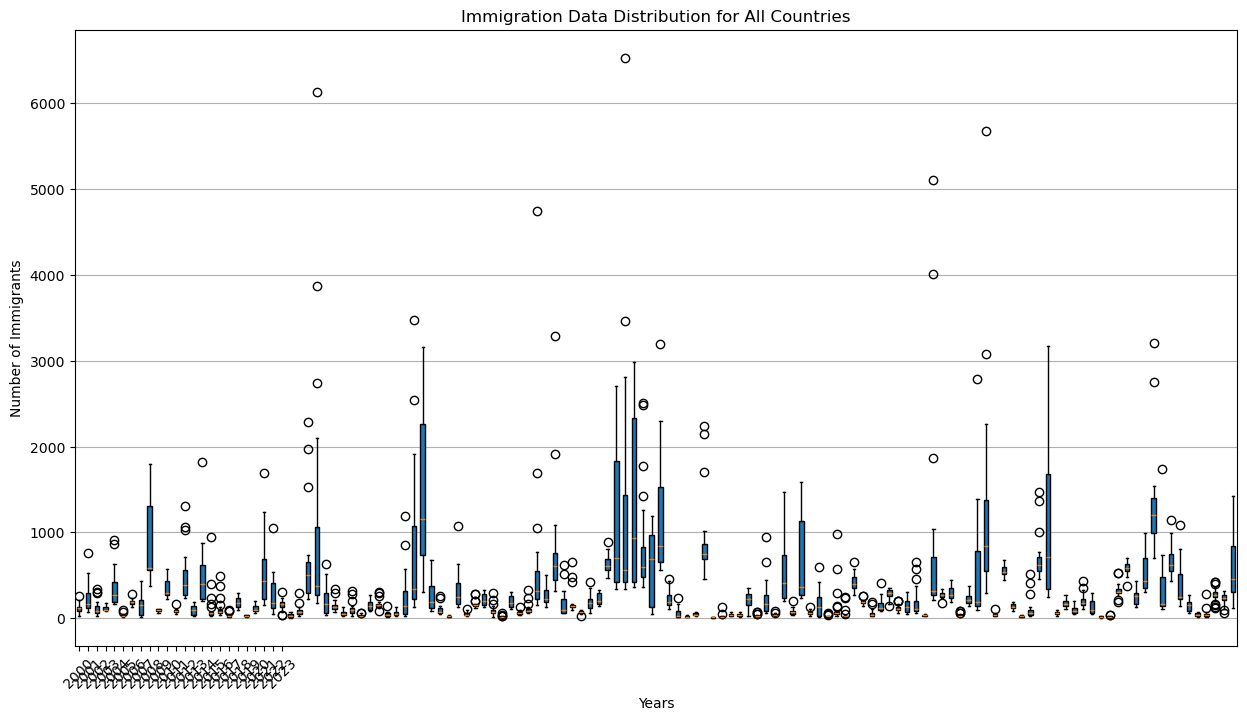

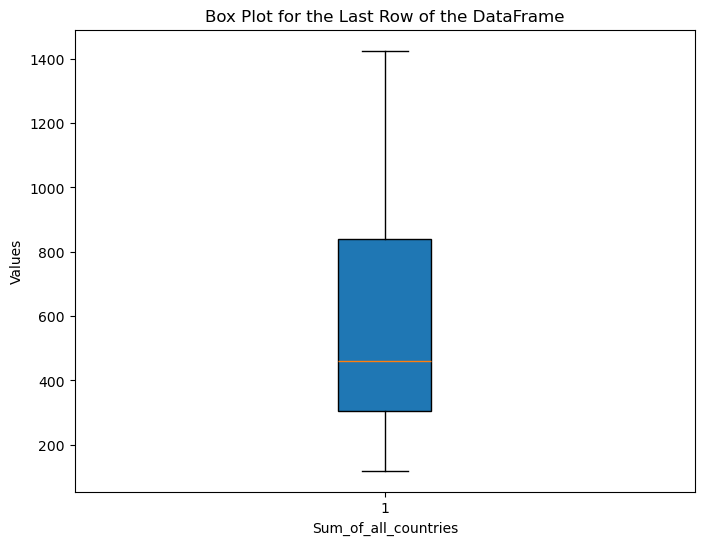

In [59]:
box_plot_a_country(df, 'Afghanistan')
box_plot_all_countries(df)
box_plot_last_row(df)